In [ ]:
import os

In [ ]:
os.chdir("/content/drive/MyDrive")

In [ ]:
os.mkdir("Breast_histopathology")

In [ ]:
os.chdir("/content/drive/MyDrive/Breast_histopathology")

In [ ]:
%pwd

'/content/drive/MyDrive/Breast_histopathology'

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download "paultimothymooney/breast-histopathology-images"

100% 3.10G/3.10G [00:17<00:00, 199MB/s]
100% 3.10G/3.10G [00:17<00:00, 191MB/s]


In [ ]:
!unzip "/content/drive/MyDrive/Breast_histopathology/breast-histopathology-images.zip"

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1351_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1401_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1451_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1501_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1551_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1601_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1651_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1701_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1751_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1801_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1851_class1.png  
  inflating: IDC_regular_ps50_idx5/10262/1/10262_idx5_x1251_y1901_class1.png  
 

In [ ]:
from keras.preprocessing.image import load_img
img = load_img('/content/drive/MyDrive/Breast_histopathology/IDC_regular_ps50_idx5/10253/0/10253_idx5_x1001_y1001_class0.png')

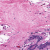

In [ ]:
img

In [ ]:
img.size

(50, 50)

In [ ]:
os.listdir("/content/drive/MyDrive/Breast_histopathology/IDC_regular_ps50_idx5/10253")

['0', '1']

In [ ]:
tar={'0':0,'1':1}

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
import os

In [ ]:
x=[]
y=[]
for i in os.listdir("/content/drive/MyDrive/Breast_histopathology/IDC_regular_ps50_idx5/10253"):
  path="/content/drive/MyDrive/Breast_histopathology/IDC_regular_ps50_idx5/10253"+"/"+i
  for j in os.listdir(path):
    path1=path+"/"+j
    img=load_img(path1,target_size=(50,50,3))
    img1=img_to_array(img)
    x.append(img1)
    y.append(tar.get(i))

In [ ]:
len(x)

549

In [ ]:
len(y)

549

In [ ]:
import numpy as np

In [ ]:
x=np.array(x)

In [ ]:
y=np.array(y)

In [ ]:
x.shape

(549, 50, 50, 3)

In [ ]:
y.shape

(549,)

In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y.shape

(549, 2)

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state = 0)

In [ ]:
x_train.shape

(366, 50, 50, 3)

In [ ]:
y_train.shape

(366, 2)

In [ ]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dense(2,activation='sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 32)          16416     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 32)        

In [ ]:
history = model1.fit(  x_train, y_train, validation_data=(x_test, y_test),  epochs= 50, verbose = 2, batch_size=250  )

Epoch 1/50
2/2 - 12s - loss: 16.5129 - accuracy: 0.6776 - val_loss: 3.9914 - val_accuracy: 0.8525 - 12s/epoch - 6s/step
Epoch 2/50
2/2 - 0s - loss: 6.6797 - accuracy: 0.8825 - val_loss: 4.3432 - val_accuracy: 0.8525 - 76ms/epoch - 38ms/step
Epoch 3/50
2/2 - 0s - loss: 6.6331 - accuracy: 0.8798 - val_loss: 3.2209 - val_accuracy: 0.8525 - 70ms/epoch - 35ms/step
Epoch 4/50
2/2 - 0s - loss: 4.8353 - accuracy: 0.8825 - val_loss: 1.7534 - val_accuracy: 0.8525 - 68ms/epoch - 34ms/step
Epoch 5/50
2/2 - 0s - loss: 3.1595 - accuracy: 0.8716 - val_loss: 0.9462 - val_accuracy: 0.8525 - 70ms/epoch - 35ms/step
Epoch 6/50
2/2 - 0s - loss: 2.1774 - accuracy: 0.8333 - val_loss: 0.6356 - val_accuracy: 0.8634 - 75ms/epoch - 37ms/step
Epoch 7/50
2/2 - 0s - loss: 1.6738 - accuracy: 0.7678 - val_loss: 0.5501 - val_accuracy: 0.8798 - 72ms/epoch - 36ms/step
Epoch 8/50
2/2 - 0s - loss: 1.1552 - accuracy: 0.8306 - val_loss: 0.4760 - val_accuracy: 0.8634 - 72ms/epoch - 36ms/step
Epoch 9/50
2/2 - 0s - loss: 0.681

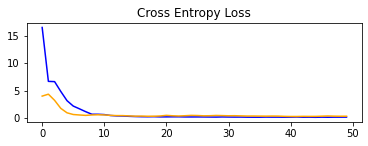

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

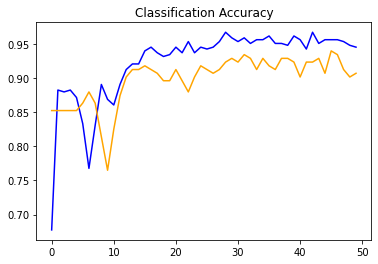

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")